# Gradiente Descendente 

O **Gradiente Descendente** é amplamente usado no treinamento de modelos de aprendizado de máquina. Ele minimiza uma função de custo \( C(w, b) \), ajustando variáveis como \( w \) (pesos) e \( b \) (viés).

---

## O Problema: Minimizar uma Função de Custo

Queremos encontrar os valores de \( w \) e \( b \) que minimizam \( C(w, b) \). Imagine isso como encontrar o ponto mais baixo de uma montanha representada pela função de custo.

---

## A Solução: O Gradiente Descendente

1. **Escolha de um ponto inicial:**
   - Iniciamos com valores aleatórios para \( w \) e \( b \).
   
2. **Cálculo do gradiente:**
   - O gradiente é dado por:
     $$
     \nabla C(w, b) = \left( \frac{\partial C}{\partial w}, \frac{\partial C}{\partial b} \right)
     $$

3. **Atualização dos parâmetros:**
   - Ajustamos os valores na direção oposta ao gradiente:
     $$
     w = w - \alpha \frac{\partial C}{\partial w}
     $$
     $$
     b = b - \alpha \frac{\partial C}{\partial b}
     $$
   - Onde \( \alpha \) é a **taxa de aprendizado**.

---

## Exemplo Prático

Minimizar \( C(w) = w^2 \) com \( \frac{dC}{dw} = 2w \) e \( \alpha = 0.1 \):

1. \( w_0 = 2 \)
2. Iterações:
   - Iteração 1: \( w = 2 - 0.1 \cdot 4 = 1.6 \)
   - Iteração 2: \( w = 1.6 - 0.1 \cdot 3.2 = 1.28 \)
   - Iteração 3: \( w = 1.28 - 0.1 \cdot 2.56 = 1.024 \)

---

## Visualizando o Gradiente Descendente

1. O gradiente aponta para o maior aumento de \( C(w, b) \).
2. Seguimos na direção oposta para minimizar a função.

---

## Variações do Gradiente Descendente

1. **Batch Gradient Descent:** Calcula o gradiente usando todo o conjunto de dados.
2. **Stochastic Gradient Descent (SGD):** Atualiza os parâmetros com uma única amostra.
3. **Mini-batch Gradient Descent:** Usa pequenos lotes de dados para calcular o gradiente.


Considere a função abaixo:

In [1]:
import sympy


x, y = sympy.symbols('x y') # define 𝑥 e 𝑦 como variáveis simbólicas que podem ser usadas para expressar equações ou funções matemáticas simbolicamente
fun = x**2 + y**2 # definição da função simbólica
calcfun = sympy.lambdify([x,y], fun) # conversão para função numérica

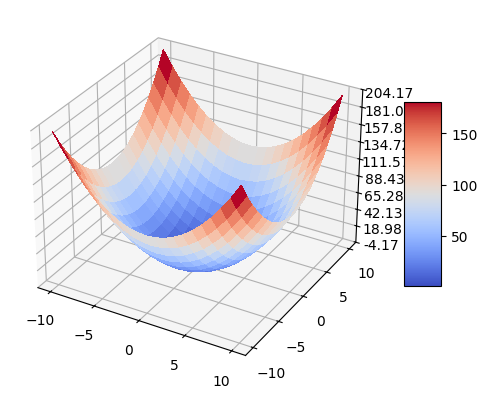

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  

X, Y = np.meshgrid(np.arange(-10, 11), np.arange(-10, 11))
Z = calcfun(X, Y)

# plotar a superfície
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

savefigs = False  
if savefigs:
    fig.savefig('grafico3d.png', dpi=150)

plt.show()


## Estimando o gradiente

In [3]:
def difference_quotient(f, x, h): # derivada
    return (f(x + h) - f(x)) / h

A função abaixo:

In [4]:
def square(x):
    return x * x

Tem a seguinte derivada:

In [5]:
def derivative(x):
    return 2 * x

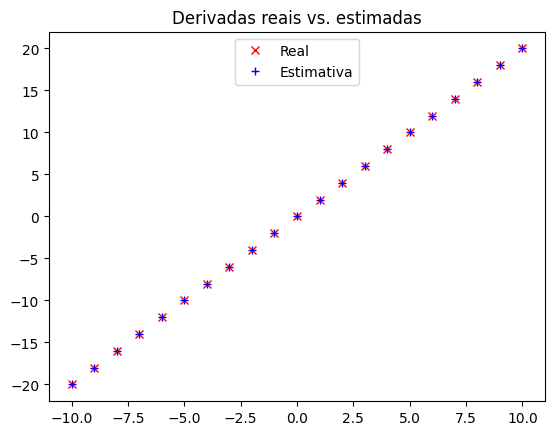

In [6]:
derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

x = np.arange(-10,11)
fig = plt.figure()
plt.title('Derivadas reais vs. estimadas')
plt.plot(x, derivative(x), 'rx', label='Real')           # red  x
plt.plot(x, derivative_estimate(x), 'b+', label='Estimativa')  # blue +
plt.legend(loc=9)
plt.show()        
if savefigs:
    fig.savefig('derivadas.png', dpi=150)

## Exercício
Use o gradiente descendente para encontrar o mínimo da função foo_f, que corresponde a:

In [7]:
def foo_f(theta): # definindo a funcao
    x, y = theta
    return (x + 3)**2 + x * y + y**2

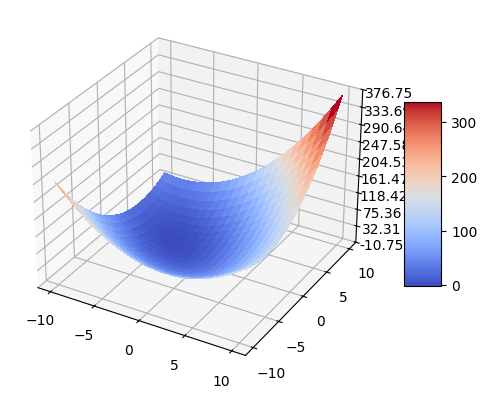

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta=np.meshgrid(np.arange(-10,11),np.arange(-10,11))
Z = foo_f(theta)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
savefigs = False
if savefigs:
    fig.savefig('grafico.png', dpi=150)

In [9]:
from scipy.optimize import minimize

def foo_gradient(theta):
    x, y = theta
    return np.array([2 * (x + 3) + y, x + 2 * y])

theta = np.array([5.0, 5.0])  # ponto inicial
learning_rate = 0.1
tolerance = 1e-6

for _ in range(10000):  # número máximo de iterações
    grad = foo_gradient(theta)
    new_theta = theta - learning_rate * grad  # atualização dos parâmetros
    if np.linalg.norm(new_theta - theta) < tolerance:  # convergência
        break
    theta = new_theta

print("Coordenadas no mínimo (gradiente descendente):", theta)
print("Valor mínimo:", foo_f(theta))

Coordenadas no mínimo (gradiente descendente): [-3.99999294  1.99999294]
Valor mínimo: -2.999999999950122


----

----

In [10]:
# função de custo f(x) = x^2 e sua derivada f'(x) = 2x
def f(x):
    return x**2

def df(x):
    return 2*x

In [11]:
# parâmetros do gradiente descendente
x = 5  # ponto inicial
learning_rate = 0.1  # taxa de aprendizado
num_iterations = 20  # número de iterações

# armazena os valores de x para visualização
x_values = [x]

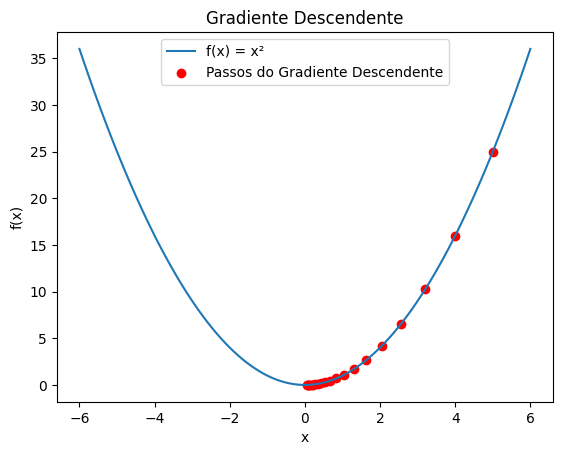

In [12]:
# gradiente descendente
for _ in range(num_iterations):
    gradiente = df(x)  # derivada em x
    x = x - learning_rate * gradiente  # atualiza x na direção oposta ao gradiente
    x_values.append(x)

# plotando a função e os passos do gradiente descendente
x_range = np.linspace(-6, 6, 100)
y_range = f(x_range)

plt.plot(x_range, y_range, label="f(x) = x²")
plt.scatter(x_values, f(np.array(x_values)), color="red", label="Passos do Gradiente Descendente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Gradiente Descendente")
plt.show()